# Dataset y Dataloader



*   Cálculos de gradientes, etc., no es eficiente para todo el conjunto de datos
*   Solución: Dividir el dataset en batches



```
# training loop
for epoch in range(num_epochs):
    # loop over all batches
    for i in range(total_batches):
        batch_i = ...
```



*   epoch = un pase de forward y backward de TODAS las muestras de entrenamiento.
*   batch_size = número de muestras de entrenamiento utilizadas en un solo paso forward/backward.
*   number of iterations = número de pases, cada paso (forward+backward) utilizando [batch_size] muestras.
*   **Ej. : 100 muestras, batch_size=20 ---> 100/20 = 5 iterations para 1 epoch**


DataLoader nos ayuda a obtener batches de forma sencilla.  

Para esto, primero se debe contruir (según el caso) un Dataset.

Para implementar Dataset personalizado, se debe:
* Heredar de Dataset (torch.utils.data.Dataset)  
* Implementar
```
__init__ , __getitem__ , y __len__
```
* __init__: Descargar datos, pre-procesar, etc.
* __getitem__(idx): Obtener la idx-ésima muestra.
* __len__: Regresa el tamaño del dataset.




In [1]:
pip install --upgrade gdown

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3


In [2]:
import gdown
!gdown https://drive.google.com/uc?id=1UARiLpBnLHJ0zFOT0tSKNaTo9NBJU_gN

Downloading...
From: https://drive.google.com/uc?id=1UARiLpBnLHJ0zFOT0tSKNaTo9NBJU_gN
To: /content/wine.csv
100% 10.9k/10.9k [00:00<00:00, 34.9MB/s]


### Dataset

In [3]:
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision

import numpy as np
import math


class WineDataset(Dataset):
    def __init__(self, dir):
        # Initialize data, download, pre-process, etc.
        # Read with numpy or pandas
        xy = np.loadtxt(dir, delimiter=',', dtype=np.float32, skiprows=1)
        self.n_samples = xy.shape[0]

        # here the first column is the class label, the rest are the features
        self.x_data = torch.from_numpy(xy[:, 1:])  # size [n_samples, n_features]
        self.y_data = torch.from_numpy(xy[:, [0]]) # size [n_samples, 1]

    # support indexing such that dataset[i] can be used to get i-th sample
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    # we can call len(dataset) to return the size
    def __len__(self):
        return self.n_samples


# create dataset
dir = 'wine.csv'
dataset = WineDataset(dir) # <---

# get first sample and unpack
first_data = dataset[0]
features, labels = first_data
print(f"Features: {features} \nLabels: {labels}")

Features: tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03]) 
Labels: tensor([1.])


### Dataloader

In [ ]:
# Load whole dataset with DataLoader

# shuffle: shuffle data, good for training

# num_workers: faster loading with multiple subprocesses

# !!! IF YOU GET AN ERROR DURING LOADING, SET num_workers TO 0 !!!

train_loader = DataLoader(dataset=dataset,
                          batch_size=4,
                          shuffle=True,
                          num_workers=2)

# convert to an iterator and look at one random sample
dataiter = iter(train_loader)
data = next(dataiter)
features, labels = data
print(f"Features: {features} \nLabels: {labels}")

Features: tensor([[1.2690e+01, 1.5300e+00, 2.2600e+00, 2.0700e+01, 8.0000e+01, 1.3800e+00,
         1.4600e+00, 5.8000e-01, 1.6200e+00, 3.0500e+00, 9.6000e-01, 2.0600e+00,
         4.9500e+02],
        [1.2520e+01, 2.4300e+00, 2.1700e+00, 2.1000e+01, 8.8000e+01, 2.5500e+00,
         2.2700e+00, 2.6000e-01, 1.2200e+00, 2.0000e+00, 9.0000e-01, 2.7800e+00,
         3.2500e+02],
        [1.3450e+01, 3.7000e+00, 2.6000e+00, 2.3000e+01, 1.1100e+02, 1.7000e+00,
         9.2000e-01, 4.3000e-01, 1.4600e+00, 1.0680e+01, 8.5000e-01, 1.5600e+00,
         6.9500e+02],
        [1.2810e+01, 2.3100e+00, 2.4000e+00, 2.4000e+01, 9.8000e+01, 1.1500e+00,
         1.0900e+00, 2.7000e-01, 8.3000e-01, 5.7000e+00, 6.6000e-01, 1.3600e+00,
         5.6000e+02]]) 
Labels: tensor([[2.],
        [2.],
        [3.],
        [3.]])


In [ ]:
# Dummy Training loop
num_epochs = 2
total_samples = len(dataset)
n_iterations = math.ceil(total_samples/4)
print(f"total_samples: {total_samples} \nn_iterations: {n_iterations}")

for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(train_loader):

        # here: 178 samples, batch_size = 4, n_iters=178/4=44.5 -> 45 iterations

        # Run your training process...

        if (i+1) % 5 == 0:
            print(f'Epoch: {epoch+1}/{num_epochs}, Step {i+1}/{n_iterations}| Inputs {inputs.shape} | Labels {labels.shape}')

total_samples: 178 
n_iterations: 45
Epoch: 1/2, Step 5/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 10/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 15/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 20/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 25/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 30/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 35/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 40/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 45/45| Inputs torch.Size([2, 13]) | Labels torch.Size([2, 1])
Epoch: 2/2, Step 5/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 2/2, Step 10/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 2/2, Step 15/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 2/2, Step 

# Transform

Las transformaciones se pueden aplicar a imágenes PIL, tensores, ndarrays o datos personalizados durante la creación del DataSet.  


* Lista completa de transformaciones integradas a PyTorch:
https://pytorch.org/docs/stable/torchvision/transforms.html

### Algunos ejemplos:

En Imágenes
---------
CenterCrop, Grayscale, Pad, RandomAffine, RandomCrop, RandomHorizontalFlip, RandomRotation, Resize, Scale

En Tensores
----------
LinearTransformation, Normalize, RandomErasing

Conversion
----------
ToPILImage: from tensor or ndrarray  
ToTensor : from numpy.ndarray or PILImage

Custom
------
Write own class

Componer múltiples transformaciones
---------------------------
composed = transforms.Compose([Rescale(256),
                               RandomCrop(224)])


Ejemplo:

In [ ]:
import torch
import torchvision
from torch.utils.data import Dataset

from torchvision import transforms


class WineDataset(Dataset):
    def __init__(self, dir, transform=None):
        xy = np.loadtxt(dir, delimiter=',', dtype=np.float32, skiprows=1)
        self.n_samples = xy.shape[0]

        # note that we do not convert to tensor here
        self.x_data = xy[:, 1:]
        self.y_data = xy[:, [0]]

        self.transform = transform

    def __getitem__(self, index):
        sample = self.x_data[index], self.y_data[index]

        if self.transform:
            sample = self.transform(sample)

        return sample

    def __len__(self):
        return self.n_samples


# Custom Transforms
# implement __call__(self, sample)

class NpToTensor:
    # Convert ndarrays to Tensors
    def __call__(self, sample):
        inputs, targets = sample
        return torch.from_numpy(inputs), torch.from_numpy(targets)


class MulTransform:
    # multiply inputs with a given factor
    def __init__(self, factor):
        self.factor = factor

    def __call__(self, sample):
        inputs, targets = sample
        inputs *= self.factor
        return inputs, targets


print('Without Transform')
dataset = WineDataset(dir)
first_data = dataset[0]
features, labels = first_data
print(type(features), type(labels))
print(f"Features: {features} \nLabels: {labels}")


print('\nWith Tensor and Multiplication Transform')
composed = torchvision.transforms.Compose([NpToTensor(), MulTransform(4)])
dataset = WineDataset(dir, transform=composed)
first_data = dataset[0]
features, labels = first_data
print(type(features), type(labels))
print(f"Features: {features} \nLabels: {labels}")

Without Transform
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
Features: [1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03] 
Labels: [1.]

With Tensor and Multiplication Transform
<class 'torch.Tensor'> <class 'torch.Tensor'>
Features: tensor([5.6920e+01, 6.8400e+00, 9.7200e+00, 6.2400e+01, 5.0800e+02, 1.1200e+01,
        1.2240e+01, 1.1200e+00, 9.1600e+00, 2.2560e+01, 4.1600e+00, 1.5680e+01,
        4.2600e+03]) 
Labels: tensor([1.])


# Deep Learning con PyTorch

## **Hiperparámetros**

En la siguiente celda se definen los hiperparámetros para la red Neuronal y el entrenamiento.

In [4]:
_INPUT_SIZE_    = 28*28
_HIDDEN_SIZE_   = 100
_NUM_CLASSES_   = 10
_NUM_EPOCHS_    = 5
_BATCH_SIZE_    = 100
_LEARNING_RATE_ = 0.001

## **Dataset**



El dataset de MNIST para clasificación de dígitos escritos a mano se encuentra ya en la librería torchvision. Se descargan los splits de train y test.

In [5]:
from torchvision import transforms

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset  = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor(), download=True)

print('Tamaño del split Train:', train_dataset.__len__())
print('Tamaño del split Test:' , test_dataset.__len__() )

100%|██████████| 9912422/9912422 [00:00<00:00, 371942308.50it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 16231501.25it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 168437891.73it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 13715283.49it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Tamaño del split Train: 60000
Tamaño del split Test: 10000


image shape: torch.Size([1, 28, 28]) 
label type: <class 'int'>
label: 3


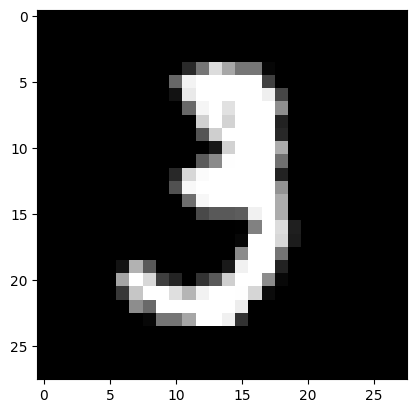

In [6]:
import matplotlib.pyplot as plt

image, label = train_dataset.__getitem__(10)

print('image shape:', image.shape, '\nlabel type:', type(label))

image = image.numpy()[0]
plt.imshow(image, cmap = 'gray')
print('label:', label)

In [7]:
from torch.utils.data import Dataset

class CustomDataset(Dataset):
  def __init__(self, original_dataset):
    self.original_dataset = original_dataset

  def __len__(self):
    return self.original_dataset.__len__()

  def __getitem__(self, idx):
    item, label = self.original_dataset.__getitem__(idx)

    return item.view(-1), label


custom_train_dataset = CustomDataset(train_dataset)
custom_test_dataset  = CustomDataset(test_dataset )

In [ ]:
image, label = custom_train_dataset.__getitem__(1)

print('image shape:', image.shape, '  label type:', type(label))

image shape: torch.Size([784])   label type: <class 'int'>




---


Una vez que ya se creó una instancia de la clase para cargar los elementos del dataset, la clase `torch.utils.data.DataLoader` permite cargar los elementos en batches del tamaño que se especifique en el parámetro `batch_size`. El parámetro `shuffle` sirve para permutar aleatoriamente los elementos del dataset después de cada época.

In [8]:
train_loader = torch.utils.data.DataLoader(dataset = custom_train_dataset, batch_size = _BATCH_SIZE_, shuffle = True)
test_loader  = torch.utils.data.DataLoader(dataset = custom_test_dataset , batch_size = _BATCH_SIZE_, shuffle = False)

In [9]:
it = iter(train_loader)
batch, labels = next(it)

print('batch shape:', batch.shape, '\nlabels shape:', labels.shape)

batch shape: torch.Size([100, 784]) 
labels shape: torch.Size([100])


## **Modelo**

Vamos a utilizar una red neuronal simple: **perceptrón multicapa**. En este caso vamos a utilizar una sola capa oculta.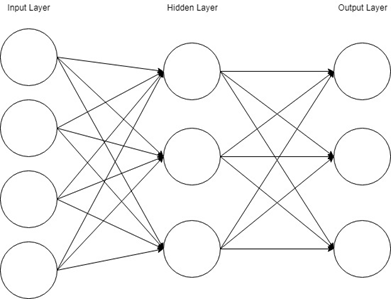


Para declarar un nuevo modelo de redes neuronales es necesario crear una clase heredada de el módulo de redes neuronales de Pytorch `nn.Module` la función forward es fundamental en la declaración de esta clase.

Para el MLP utilizaremos tres módulos básicos de PyTorch:

* `nn.Sequential(*args: Module)`: es un módulo que guarda una lista de módulos y los aplica en forma secuencial. Se le da como parámetro la lista de módulos y los aplica en el mismo órden.
* `nn.Linear(in_features, out_features, bias=True, device=None, dtype=None)`: es una capa densa con la forma $ xA^T + b $.
* `nn.ReLU()`: activación ReLU definida como $ \max(0,x) $ elemento por elemento.


In [ ]:
import torch.nn as nn

class MLP(nn.Module):
  def __init__(self, indim, hidden, out):
    super(MLP,self).__init__()

    self.estructura = nn.Sequential(
        nn.Linear(indim,hidden), # hidden layer
        nn.ReLU(),               # activation
        nn.Linear(hidden,out)    # output layer
    )

  def forward(self, x):
    x = self.estructura(x)

    return x

In [ ]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

model = MLP(_INPUT_SIZE_, _HIDDEN_SIZE_, _NUM_CLASSES_).to(device)

In [ ]:
model

MLP(
  (estructura): Sequential(
    (0): Linear(in_features=784, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=10, bias=True)
  )
)

## **Entrenamiento**

Se define la función de costo, el optimizador que se utilizará (algoritmo de optimización) y el número de pasos en los que se va a reportar la función de costo promedio.

In [ ]:
# Parámetros de entrenamiento

Loss      = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = _LEARNING_RATE_, )

logging_steps = len(train_loader)/10

Para el entrenamiento simplemente se itera por el número de épocas y en cada época se itera por todos los batches del conjunto de datos completo. En cada batch se calcula la predicción del modelo, la función de costo y se aplica el paso del algoritmo de optimización.

In [ ]:
for epoch in range(_NUM_EPOCHS_):
  print('\nEpoch', epoch + 1, '\n')

  for i, (x, labels) in enumerate(train_loader): # iterate for all batches

    # initialize average loss
    if i%( logging_steps ) == 0:
      avg_loss = 0.0

    # move tensors to device
    x = x.to(device)
    labels = labels.to(device)

    # compute model prediction and loss
    pred_vec = model(x)
    loss     = Loss(input = pred_vec, target = labels)
    avg_loss += loss

    # restart grad, make backpropagation and make step
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # report average loss
    if (i+1)%( logging_steps ) == 0:
      avg_loss /= logging_steps
      print('Paso', i+1, ' pérdida promedio:', avg_loss.item())




Epoch 1 

Paso 60  pérdida promedio: 1.2237226963043213
Paso 120  pérdida promedio: 0.47588714957237244
Paso 180  pérdida promedio: 0.369038850069046
Paso 240  pérdida promedio: 0.3520224094390869
Paso 300  pérdida promedio: 0.3210521340370178
Paso 360  pérdida promedio: 0.2822538912296295
Paso 420  pérdida promedio: 0.27580568194389343
Paso 480  pérdida promedio: 0.2610292136669159
Paso 540  pérdida promedio: 0.2560834288597107
Paso 600  pérdida promedio: 0.2701430916786194

Epoch 2 

Paso 60  pérdida promedio: 0.24058939516544342
Paso 120  pérdida promedio: 0.22675155103206635
Paso 180  pérdida promedio: 0.22277288138866425
Paso 240  pérdida promedio: 0.20289921760559082
Paso 300  pérdida promedio: 0.19720594584941864
Paso 360  pérdida promedio: 0.19787736237049103
Paso 420  pérdida promedio: 0.18124355375766754
Paso 480  pérdida promedio: 0.18246598541736603
Paso 540  pérdida promedio: 0.17587751150131226
Paso 600  pérdida promedio: 0.1551007479429245

Epoch 3 

Paso 60  pérdida pr

## **Test**

Recordamos que el modelo da como salida un vector de tamaño _NUM_CLASSES_, que en este caso es 10. Por la función de costo que utilizamos, la clase con mayor probabilidad será el índice de la entrada con mayor valor.

Para el test se utiliza la excepción `torch.no_grad()`, que básicamente desactiva el cálculo del gradiente, ya que se estarán aplicando muchas operaciones con tensores que no necesitan gradiente.

In [ ]:
with torch.no_grad():
  n_correct = 0

  for x, labels in test_loader:
    x = x.to(device)
    labels = labels.to(device)

    pred_vec    = model(x)
    _, pred_labels = torch.max(pred_vec, dim = 1) # it returns: values, indices

    n_correct += (pred_labels == labels).sum().item()

acc = 100.0 * n_correct / custom_test_dataset.__len__()

In [ ]:
print('accuracy:', acc)

accuracy: 97.01


# Introducción a NLP con PyTorch

## **Hiperparámetros**

In [ ]:
_INPUT_SIZE_    = 1000
_HIDDEN_SIZE_   = 1200
_NUM_CLASSES_   = 2
_NUM_EPOCHS_    = 10
_BATCH_SIZE_    = 64
_LEARNING_RATE_ = 0.001

## **Dataset**

In [ ]:
!gdown https://drive.google.com/uc?id=1GSrykEbhF9kJMfhj3Bkm0BiVkjoznR9i

Downloading...
From: https://drive.google.com/uc?id=1GSrykEbhF9kJMfhj3Bkm0BiVkjoznR9i
To: /content/dataMEXA3.zip
100% 300k/300k [00:00<00:00, 103MB/s]


In [ ]:
!unzip dataMEXA3.zip

Archive:  dataMEXA3.zip
replace dataMEXA3/mex20_test_full.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: dataMEXA3/mex20_test_full.txt  
replace dataMEXA3/mex20_train.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: [y]
error:  invalid response [[y]]
replace dataMEXA3/mex20_train.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
  inflating: dataMEXA3/mex20_train.txt  
replace dataMEXA3/mex20_train_labels.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: dataMEXA3/mex20_train_labels.txt  
replace dataMEXA3/mex20_val.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace dataMEXA3/mex20_val_labels.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: no


In [ ]:
# CREATE DATASET CLASS---------------------------------------------------------------------------------------------

import os
from torch.utils.data import Dataset
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

class mexA3(Dataset):
    def __init__(self, Dir, split, vectorizer = None):

        # Read all data --------------------------------------------------------

        text_file = os.path.join(Dir, 'mex20_' + split + '.txt')
        self.text = [line for line in open(text_file)]

        labels_file = os.path.join(Dir, 'mex20_' + split + '_labels.txt')
        self.labels = [int(line) for line in open(labels_file)]


        # Construct BoW- Tfidf--------------------------------------------------------

        if vectorizer is None:
          vectorizer = TfidfVectorizer(max_features = _INPUT_SIZE_)
          self.X     = np.array(vectorizer.fit_transform(self.text).todense())
        else:
          self.X     = np.array(vectorizer.transform(self.text).todense())

        self.vectorizer = vectorizer

    def __len__(self):
        return len(self.text)

    def __getitem__(self, idx):
        item  = torch.tensor(self.X[idx]).double()

        return item, self.labels[idx]

In [ ]:
Dir = 'dataMEXA3'

train_dataset = mexA3(Dir, 'train')
test_dataset  = mexA3(Dir, 'val' , vectorizer = train_dataset.vectorizer)

train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = _BATCH_SIZE_, shuffle = True)
test_loader  = torch.utils.data.DataLoader(dataset = test_dataset , batch_size = _BATCH_SIZE_, shuffle = False)

## **Modelo, Entrenamiento y Test**

In [ ]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

model = MLP(_INPUT_SIZE_, _HIDDEN_SIZE_, _NUM_CLASSES_).to(device).double()

In [ ]:
# Parámetros de entrenamiento

Loss      = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = _LEARNING_RATE_)

logging_steps = len(train_loader)//10

In [ ]:
logging_steps

8

In [ ]:
for epoch in range(_NUM_EPOCHS_):
  print('\nEpoch', epoch + 1, '\n')

  for i, (x, labels) in enumerate(train_loader): # iterate for all batches

    # initialize average loss
    if i%( logging_steps ) == 0:
      avg_loss = 0.0

    # move tensors to device
    x = x.to(device)
    labels = labels.to(device)

    # compute model prediction and loss
    pred_vec = model(x)
    loss     = Loss(input = pred_vec, target = labels)
    avg_loss += loss

    # restart grad, make backpropagation and make step
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # report average loss
    if (i+1)%( logging_steps ) == 0:
      avg_loss /= logging_steps
      print('Paso', i+1, ' pérdida promedio:', avg_loss.item())




Epoch 1 

Paso 8  pérdida promedio: 0.658942557310266
Paso 16  pérdida promedio: 0.5810144614364641
Paso 24  pérdida promedio: 0.5918797189497133
Paso 32  pérdida promedio: 0.5705472147041668
Paso 40  pérdida promedio: 0.506511916377692
Paso 48  pérdida promedio: 0.4879269495503197
Paso 56  pérdida promedio: 0.5117706055728962
Paso 64  pérdida promedio: 0.4517092409782668
Paso 72  pérdida promedio: 0.44098282507780706
Paso 80  pérdida promedio: 0.4140824744173467

Epoch 2 

Paso 8  pérdida promedio: 0.3098942810028206
Paso 16  pérdida promedio: 0.32756727488716486
Paso 24  pérdida promedio: 0.3402414798999508
Paso 32  pérdida promedio: 0.3456745306978878
Paso 40  pérdida promedio: 0.3429029286948295
Paso 48  pérdida promedio: 0.3772153588468083
Paso 56  pérdida promedio: 0.3175392395232932
Paso 64  pérdida promedio: 0.3505755519253116
Paso 72  pérdida promedio: 0.3561153264081324
Paso 80  pérdida promedio: 0.313670839783248

Epoch 3 

Paso 8  pérdida promedio: 0.28610370808031754
Paso

In [ ]:
with torch.no_grad():
  n_correct = 0

  for x, labels in test_loader:
    x = x.to(device)
    labels = labels.to(device)

    pred_vec    = model(x)
    _, pred_labels = torch.max(pred_vec, dim = 1) # it returns: values, indices

    n_correct += (pred_labels == labels).sum().item()


acc = 100.0 * n_correct / test_dataset.__len__()

In [ ]:
print('accuracy:', round(acc, 1))

accuracy: 84.8
